# Imports

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

import pylab
import matplotlib.pyplot as plt
%matplotlib inline
 
from sklearn.linear_model import LogisticRegression

import seaborn as sns
import scipy.stats as stats

# Data Sets

In [4]:
TrainSet = pd.read_csv("train.csv")
TestSet = pd.read_csv("test.csv")

# Exploring the data

In [5]:
TrainSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
TrainSet =  TrainSet.drop('Name', axis=1)
TestSet =  TestSet.drop('Name', axis=1)

In [7]:
le = LabelEncoder()
TrainSet.Sex = le.fit_transform(TrainSet.Sex)
model_mapping = {index : label for index, label in enumerate(le.classes_)}
model_mapping

{0: 'female', 1: 'male'}

In [8]:
TrainSet.Ticket = le.fit_transform(TrainSet.Ticket)


In [9]:
TrainSet.Embarked = le.fit_transform(TrainSet.Embarked)
model_mapping = {index : label for index, label in enumerate(le.classes_)}
model_mapping

{0: 'C', 1: 'Q', 2: 'S', 3: nan}

In [10]:
TrainSet.Cabin = le.fit_transform(TrainSet.Cabin)
model_mapping = {index : label for index, label in enumerate(le.classes_)}
model_mapping

{0: 'A10',
 1: 'A14',
 2: 'A16',
 3: 'A19',
 4: 'A20',
 5: 'A23',
 6: 'A24',
 7: 'A26',
 8: 'A31',
 9: 'A32',
 10: 'A34',
 11: 'A36',
 12: 'A5',
 13: 'A6',
 14: 'A7',
 15: 'B101',
 16: 'B102',
 17: 'B18',
 18: 'B19',
 19: 'B20',
 20: 'B22',
 21: 'B28',
 22: 'B3',
 23: 'B30',
 24: 'B35',
 25: 'B37',
 26: 'B38',
 27: 'B39',
 28: 'B4',
 29: 'B41',
 30: 'B42',
 31: 'B49',
 32: 'B5',
 33: 'B50',
 34: 'B51 B53 B55',
 35: 'B57 B59 B63 B66',
 36: 'B58 B60',
 37: 'B69',
 38: 'B71',
 39: 'B73',
 40: 'B77',
 41: 'B78',
 42: 'B79',
 43: 'B80',
 44: 'B82 B84',
 45: 'B86',
 46: 'B94',
 47: 'B96 B98',
 48: 'C101',
 49: 'C103',
 50: 'C104',
 51: 'C106',
 52: 'C110',
 53: 'C111',
 54: 'C118',
 55: 'C123',
 56: 'C124',
 57: 'C125',
 58: 'C126',
 59: 'C128',
 60: 'C148',
 61: 'C2',
 62: 'C22 C26',
 63: 'C23 C25 C27',
 64: 'C30',
 65: 'C32',
 66: 'C45',
 67: 'C46',
 68: 'C47',
 69: 'C49',
 70: 'C50',
 71: 'C52',
 72: 'C54',
 73: 'C62 C64',
 74: 'C65',
 75: 'C68',
 76: 'C7',
 77: 'C70',
 78: 'C78',
 79: 'C

In [11]:
TestSet.Sex = le.fit_transform(TestSet.Sex)
TestSet.Embarked = le.fit_transform(TestSet.Embarked)
TestSet.Ticket = le.fit_transform(TestSet.Ticket)
TestSet.Cabin = le.fit_transform(TestSet.Cabin)

## Know how much of each (Not going to transform the object..)

In [13]:
TrainSet['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [14]:
TrainSet['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [15]:
TrainSet['Sex'].value_counts()

1    577
0    314
Name: Sex, dtype: int64

In [16]:
TrainSet['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [17]:
TrainSet['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [18]:
TrainSet['Embarked'].value_counts()

2    644
0    168
1     77
3      2
Name: Embarked, dtype: int64

## Data distribution

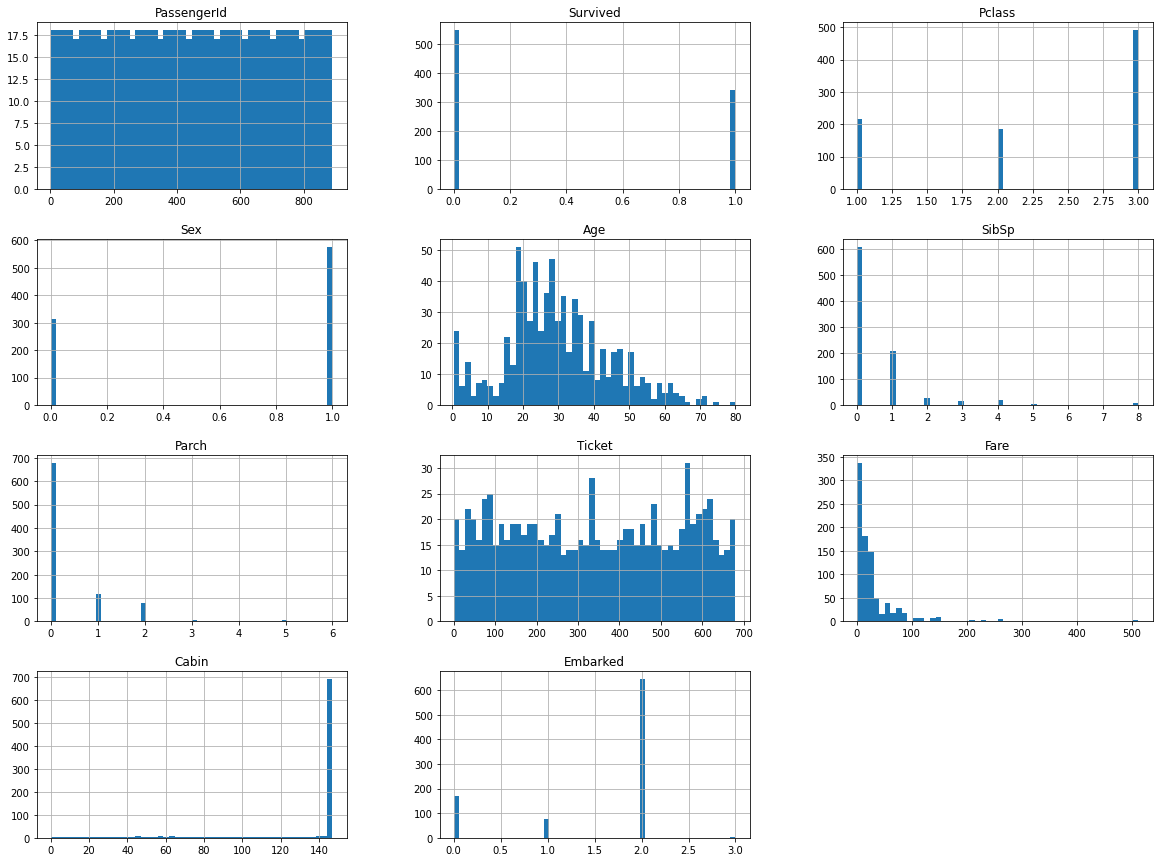

In [19]:
TrainSet.hist(bins=50, figsize=(20,15))
plt.show()

## Descriptive statistics

In [20]:
TrainSet.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,338.528620,32.204208,130.744108,1.538721
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,200.850657,49.693429,36.024237,0.794231
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,158.500000,7.910400,147.000000,1.000000
50%,446.000000,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,337.000000,14.454200,147.000000,2.000000
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,519.500000,31.000000,147.000000,2.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,680.000000,512.329200,147.000000,3.000000


## Linear correlation with the data set

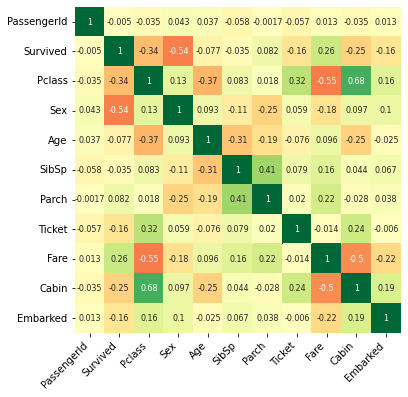

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))

sns.heatmap(
    TrainSet.corr(),
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = "RdYlGn",
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)


ax.tick_params(labelsize = 10)

The most important variables are:


1. Pclass
1. Sex
1. Fare
1. Cabin

In [22]:
Train = TrainSet[['PassengerId','Survived','Pclass','Age','Sex','Ticket','Fare','Cabin','Embarked','SibSp']]
Test = TestSet[['PassengerId','Pclass','Age','Sex','Ticket','Fare','Cabin','Embarked','SibSp']]

In [23]:
Train.isna().sum()


PassengerId      0
Survived         0
Pclass           0
Age            177
Sex              0
Ticket           0
Fare             0
Cabin            0
Embarked         0
SibSp            0
dtype: int64

In [24]:
Test.isna().sum()


PassengerId     0
Pclass          0
Age            86
Sex             0
Ticket          0
Fare            1
Cabin           0
Embarked        0
SibSp           0
dtype: int64

In [25]:
mean_age_train = Train['Age'].mean()
mean_age_test = Test['Age'].mean()

Train.fillna(mean_age_train,inplace=True)
Test.fillna(mean_age_test,inplace=True)

In [26]:
Train.isna().sum()


PassengerId    0
Survived       0
Pclass         0
Age            0
Sex            0
Ticket         0
Fare           0
Cabin          0
Embarked       0
SibSp          0
dtype: int64

In [27]:
Test.isna().sum()


PassengerId    0
Pclass         0
Age            0
Sex            0
Ticket         0
Fare           0
Cabin          0
Embarked       0
SibSp          0
dtype: int64

# Split The data

In [28]:
X_train = Train.drop('Survived',axis=1)
y_train = Train[['Survived']]

# Logistic

In [29]:
clf = LogisticRegression()
clf.fit(X_train, y_train)


LogisticRegression()

In [30]:
y_pred = clf.predict(Test)

In [31]:
sub = {'PassengerId': TestSet.PassengerId,'Survived': y_pred }
sub = pd.DataFrame(data=sub)

In [32]:
sub.to_csv('submission.csv', index = False)

In [33]:
sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
